# ELO MERCHANT CATEGORY RECOMMENDATION 
### COMPETITION ON KAGGLE
## EDA OF historical_trainsactions.csv
### 27-12-2018

In [1]:
## Variables specific for competition

ID = 'card_id'                                            
TARGET = 'target'    

RAW_DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/rawdata/'  
DIRECTORY = 'C:/Users/judit/Documents/learning/kaggle/Elo_201812/data/'
HIST_TRANS_FILE = RAW_DIRECTORY + 'historical_transactions.csv'
MERCHANTS_FILE = RAW_DIRECTORY + 'merchants.csv'
NEW_MERCH_TRANS_FILE = RAW_DIRECTORY + 'new_merchant_transactions.csv'
TRAIN_FILE = RAW_DIRECTORY + 'train.csv'    
TEST_FILE = RAW_DIRECTORY +'test.csv'
SAMPLE_SUBMISSION_FILE = RAW_DIRECTORY + 'sample_submission.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
#import missingno
import pickle

random.seed(1)

In [3]:
hist = pd.read_csv(HIST_TRANS_FILE)

In [4]:
hist.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [5]:
for idx in range(len(hist.columns)):
    print(hist.dtypes[idx], ' '*6, hist.columns[idx])

object        authorized_flag
object        card_id
int64        city_id
object        category_1
int64        installments
object        category_3
int64        merchant_category_id
object        merchant_id
int64        month_lag
float64        purchase_amount
object        purchase_date
float64        category_2
int64        state_id
int64        subsector_id


In [6]:
hist.shape

(29112361, 14)

## Separate numeric and categorical variables

In [9]:
# Find columns with numeric (int or float) values and nonnumeric (categorical) variables

nonnumeric_cols = hist.dtypes[hist.dtypes == 'object'].index.copy()
numeric_cols = hist.dtypes[hist.dtypes != 'object'].index.copy()
print(nonnumeric_cols)
print(numeric_cols)

Index(['authorized_flag', 'card_id', 'category_1', 'category_3', 'merchant_id',
       'purchase_date'],
      dtype='object')
Index(['city_id', 'installments', 'merchant_category_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id'],
      dtype='object')


In [10]:
## Number of variables with different dtypes
hist.dtypes.value_counts()

object     6
int64      6
float64    2
dtype: int64

In [17]:
def describe_variable(dt, data = hist):
    print('--------------------------------------------')
    for c in data.columns:
        if data[c].dtype == dt:
            t1 = data[c]
            if dt == "object":
                f1 = t1[pd.isnull(t1) == False].value_counts()
                fp1 = 100 * t1[pd.isnull(t1) == False].value_counts() / sum(t1[pd.isnull(t1) == False].value_counts())
                f = pd.concat([f1, fp1], axis = 1, sort = False)
                f.columns=['Hist', 'Hist percent']
            else:
                f1 = t1[pd.isnull(t1) == False].describe()
                f = pd.concat([f1], axis = 1)
                f.columns=['Hist']
            m1 = sum(t1.isnull())
            print(dt + ' - ' + c)
            print('Number of unique values: %d' % (len(t1.value_counts())))
            print('Number of missing values: %d' %  (m1))
            if dt == 'object':
                print(f.sort_values(by = 'Hist', ascending = False).iloc[:15])
            else:
                print(f)
            
            if dt != "object":
                if len(t1.value_counts())<=15:
                    c1 = t1.value_counts()
                    p1 = 100. * c1 / sum(c1)
                    c = pd.concat([c1, p1], axis=1)
                    c.columns=['Hist', 'Hist percent']
                    print(c)
            print('=' * 30)

In [18]:
describe_variable('int64')

--------------------------------------------
int64 - city_id
Number of unique values: 308
Number of missing values: 0
               Hist
count  2.911236e+07
mean   1.293256e+02
std    1.042563e+02
min   -1.000000e+00
25%    5.300000e+01
50%    9.000000e+01
75%    2.120000e+02
max    3.470000e+02
int64 - installments
Number of unique values: 15
Number of missing values: 0
               Hist
count  2.911236e+07
mean   6.484954e-01
std    2.795577e+00
min   -1.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    9.990000e+02
          Hist  Hist percent
 0    15411747     52.938843
 1    11677522     40.111903
 2      666416      2.289117
 3      538207      1.848723
 4      179525      0.616662
-1      178159      0.611970
 6      132634      0.455593
 10     118827      0.408167
 5      116090      0.398765
 12      55064      0.189143
 8       20474      0.070328
 7       10906      0.037462
 9        5772      0.019827
 11        830      0.002851
 999      

In [19]:
describe_variable('float64')

--------------------------------------------
float64 - purchase_amount
Number of unique values: 215014
Number of missing values: 0
               Hist
count  2.911236e+07
mean   3.640090e-02
std    1.123522e+03
min   -7.469078e-01
25%   -7.203559e-01
50%   -6.883495e-01
75%   -6.032543e-01
max    6.010604e+06
float64 - category_2
Number of unique values: 5
Number of missing values: 2652864
               Hist
count  2.645950e+07
mean   2.194578e+00
std    1.531896e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    3.000000e+00
max    5.000000e+00
         Hist  Hist percent
1.0  15177199     57.360119
3.0   3911795     14.784087
5.0   3725915     14.081579
4.0   2618053      9.894568
2.0   1026535      3.879647


In [20]:
describe_variable('object')

--------------------------------------------
object - authorized_flag
Number of unique values: 2
Number of missing values: 0
       Hist  Hist percent
Y  26595452     91.354501
N   2516909      8.645499
object - card_id
Number of unique values: 325540
Number of missing values: 0
                 Hist  Hist percent
C_ID_3d3dfdc692  5582      0.019174
C_ID_0cd2ce025c  2912      0.010003
C_ID_cc3d4cd4e3  2143      0.007361
C_ID_5ccc07beb9  2066      0.007097
C_ID_5ea401d358  1786      0.006135
C_ID_6ae9f40da5  1665      0.005719
C_ID_9f81506906  1665      0.005719
C_ID_272aa0597a  1647      0.005657
C_ID_9f63809b99  1634      0.005613
C_ID_80c1c711c9  1593      0.005472
C_ID_2524b5234d  1550      0.005324
C_ID_f352d1be7e  1546      0.005310
C_ID_0b84a29e2e  1517      0.005211
C_ID_f085d75a85  1491      0.005122
C_ID_66197df71f  1478      0.005077
object - category_1
Number of unique values: 2
Number of missing values: 0
       Hist  Hist percent
N  27028332     92.841429
Y   2084029      

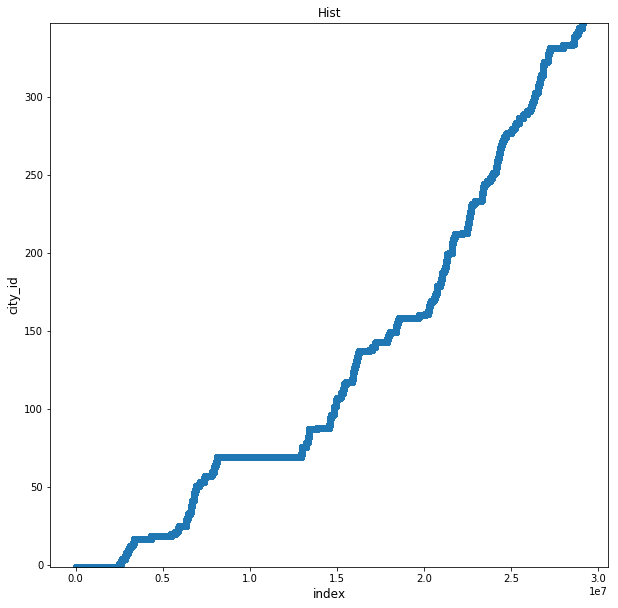

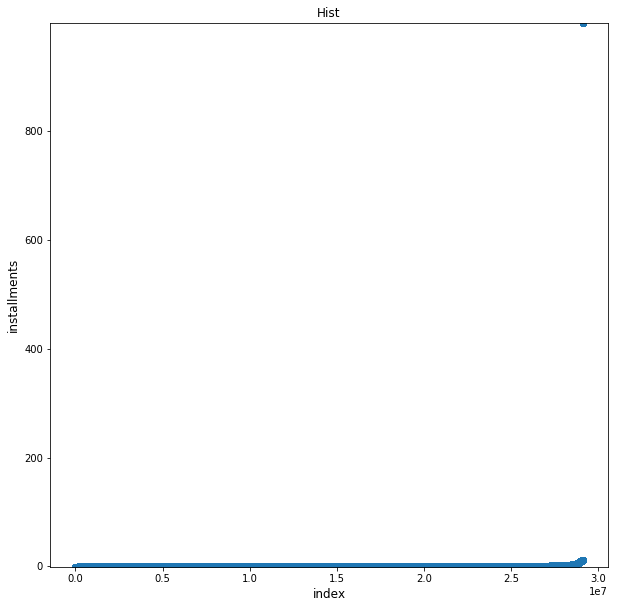

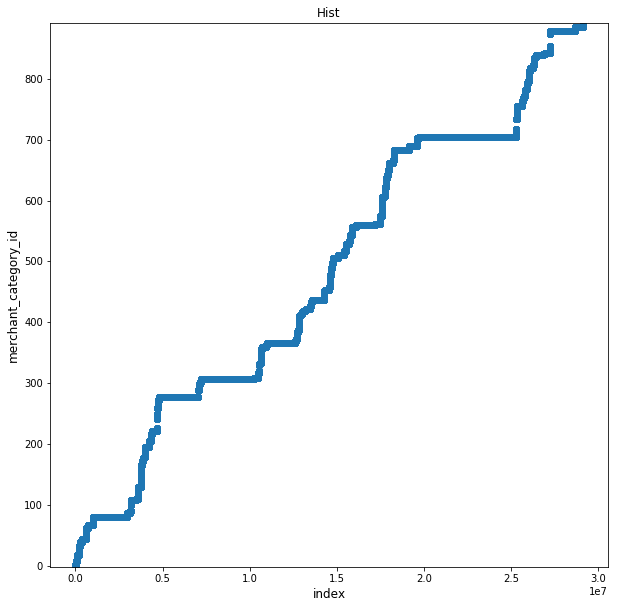

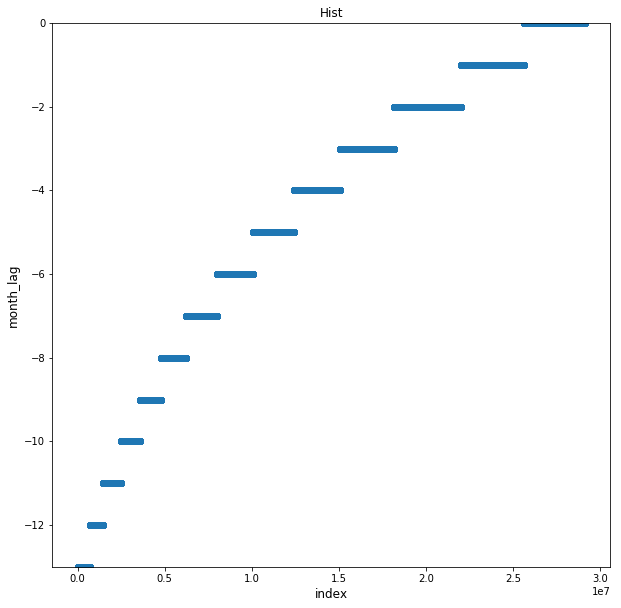

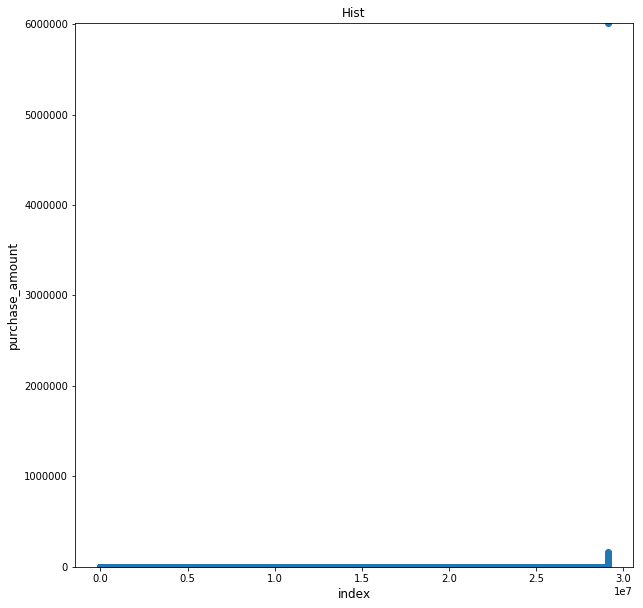

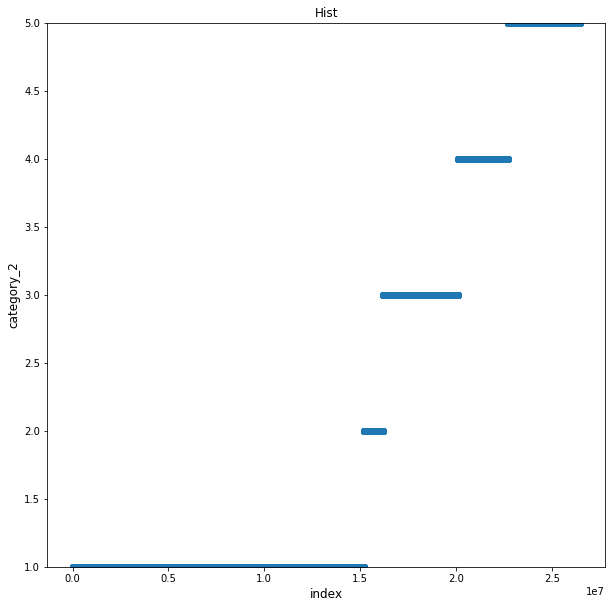

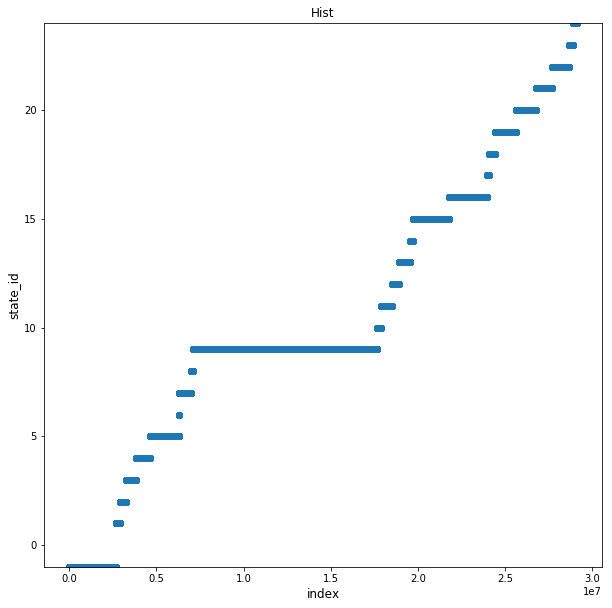

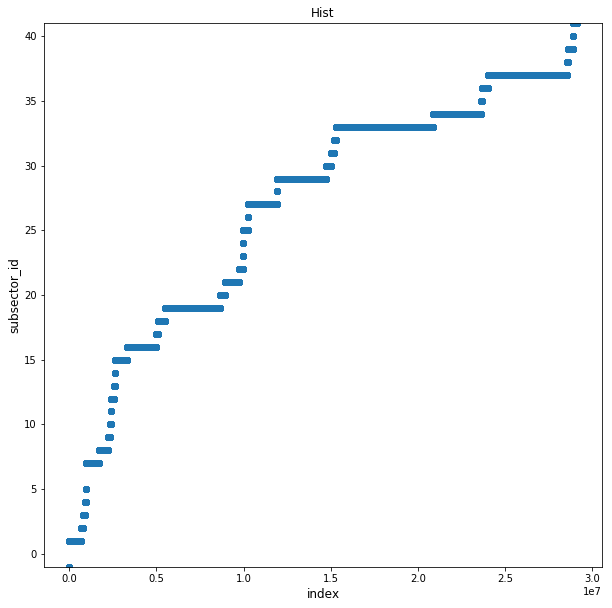

In [22]:
# Check for outliers
def scatterplots(dataframe = hist):
    for c in dataframe.columns:
        if dataframe[c].dtype != 'object':
            minval = min(dataframe[c])
            maxval = max(dataframe[c])
            fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, sharey = True, figsize = (10, 10))
            ax1.scatter(range(dataframe.shape[0]), np.sort(dataframe[c].values))
            ax1.set_ylim([minval, maxval])
            ax1.set_title('Hist')
            ax1.set_xlabel('index', fontsize = 12)
            ax1.set_ylabel(c, fontsize = 12)
            fig.show

## uncomment the next line for the scatter plots
scatterplots(hist)

## Correlation

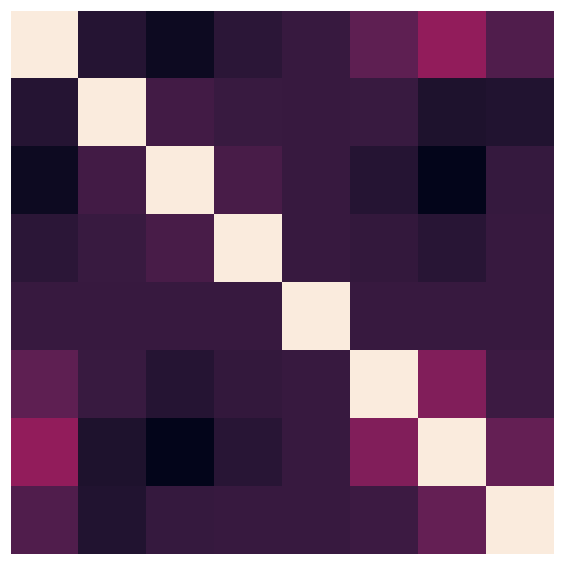

In [23]:
corrmat = hist.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,xticklabels=False,yticklabels=False,cbar=False)

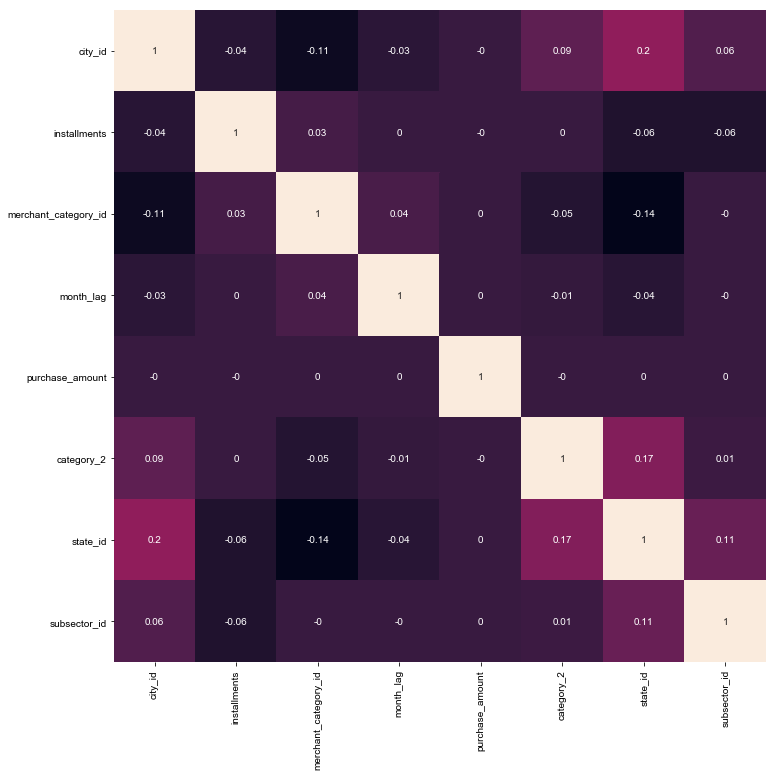

In [25]:
corrmat = hist.corr().round(decimals = 2)
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat, vmax = .8, square=True,xticklabels=True,yticklabels=True,cbar=False,annot=True)
sns.set(font_scale = 0.8)

In [27]:
# Calculate the variable inflation factor for the numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def find_multicollinearity(X, thresh = 5.0):
    '''X - pandas dataframe'''
    variables = list(X.columns)
    #num_var = len(variables)
    vif = [variance_inflation_factor(X.as_matrix(), ix) for ix in range(X.shape[1])]
    columns_with_high_vif = []
    i = 1
    while max(vif) > thresh:
        print(i)
        maxloc = vif.index(max(vif))
        print('dropping ', X.columns[maxloc], ' with vif: ', vif[maxloc])
        columns_with_high_vif.append(X.columns[maxloc])
        variables.pop(maxloc)
        X = X[variables]
        vif = [variance_inflation_factor(X.as_matrix(), ix) for ix in range(X.shape[1])]
        i = i + 1
    print('Remaining variables:')
    print(X[variables].columns)
    return X, columns_with_high_vif

col_sel = hist.columns[hist.dtypes == 'int64'].append(hist.columns[hist.dtypes == 'float64'])
X = hist[col_sel].dropna()
print(X.shape)

Y, columns_with_high_vif = find_multicollinearity(X)

(26459497, 8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


1
dropping  subsector_id  with vif:  6.05952284624


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Remaining variables:
Index(['city_id', 'installments', 'merchant_category_id', 'month_lag',
       'state_id', 'purchase_amount', 'category_2'],
      dtype='object')
